In [15]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import seaborn as sns

In [22]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Product level Amazon vs. non-Amazon for the before period: histogram on review counts, sentiment, image count, word count, helpfulness count

In [5]:
folder_path = '/Users/yujinglai/Dropbox/Eugenie/data/processed_julian_amazon_data/'
product_data_folder = 'product_data/'
did_folder = 'did/'
product_data_file = 'products_stats_top10_extend.csv'
product_week_file = 'products_overall_description_top10_extend.csv'

In [6]:
folder = os.path.join(folder_path, product_data_folder)
file = os.path.join(folder, product_data_file)
stats = pd.read_csv(file, low_memory=False)

In [7]:
folder = os.path.join(folder_path, did_folder)
file = os.path.join(folder, product_week_file)
data = pd.read_csv(file, low_memory=False)

In [8]:
amazon = data[['asin','amazon']]
stats = pd.merge(stats, amazon, on='asin')

In [9]:
data.columns

Index(['asin', 'category', 'brand', 'price', 'amazon', 'sim1',
       'total_review_count', 'avg_rating', 'avg_sentiment', 'avg_word_count',
       'avg_vote', 'avg_image', 'weekly_vote_count', 'non_5_stars_avg_vote',
       '5_stars_avg_vote', 'non_5_stars_reviews_count',
       '5_stars_reviews_count'],
      dtype='object')

In [10]:
cols = ['asin','category', 'brand', 'price', 'amazon', 'sim1',
       'total_review_count', 'avg_rating', 'avg_sentiment', 'avg_word_count',
       'avg_vote', 'avg_image', 'weekly_vote_count', 'non_5_stars_avg_vote',
       '5_stars_avg_vote', 'non_5_stars_reviews_count',
       '5_stars_reviews_count']

In [11]:
data = data[cols].drop_duplicates()

In [12]:
data.head()

,asin,category,brand,price,amazon,sim1,total_review_count,avg_rating,avg_sentiment,avg_word_count,avg_vote,avg_image,weekly_vote_count,non_5_stars_avg_vote,5_stars_avg_vote,non_5_stars_reviews_count,5_stars_reviews_count
0,B001KVOSK6,Cell Phones & Accessories,Maxell,4.09,0,B00NH12EHQ,24,4.250000,0.338583,42.083333,0.208333,0.0,0.208333,0.625000,0.0,8.0,16.0
1,B00511PS3C,Cell Phones & Accessories,AmazonBasics,NaN,1,B00511PS3C,83,3.927711,0.329333,92.903614,0.024096,0.0,0.024096,0.052632,0.0,38.0,45.0
2,B009RQ1M5K,Cell Phones & Accessories,Verizon,10.99,0,B00NH12EHQ,20,4.150000,0.406335,158.600000,0.000000,0.0,0.000000,0.000000,0.0,9.0,11.0
3,B00CHSEMR0,Cell Phones & Accessories,EMPIRE,4.94,0,B00NH12EHQ,11,4.363636,0.543318,40.454545,0.000000,0.0,0.000000,0.000000,0.0,4.0,7.0
4,B00ERPMJZI,Cell Phones & Accessories,VANDOT,NaN,0,B00NH12EHQ,11,3.000000,0.206400,125.545455,1.272727,0.0,1.272727,0.857143,2.0,7.0,4.0


In [25]:
labels = ['Non-Amazon','Amazon']
cols = ['total_review_count','avg_rating','avg_vote','avg_sentiment','avg_word_count','avg_image']

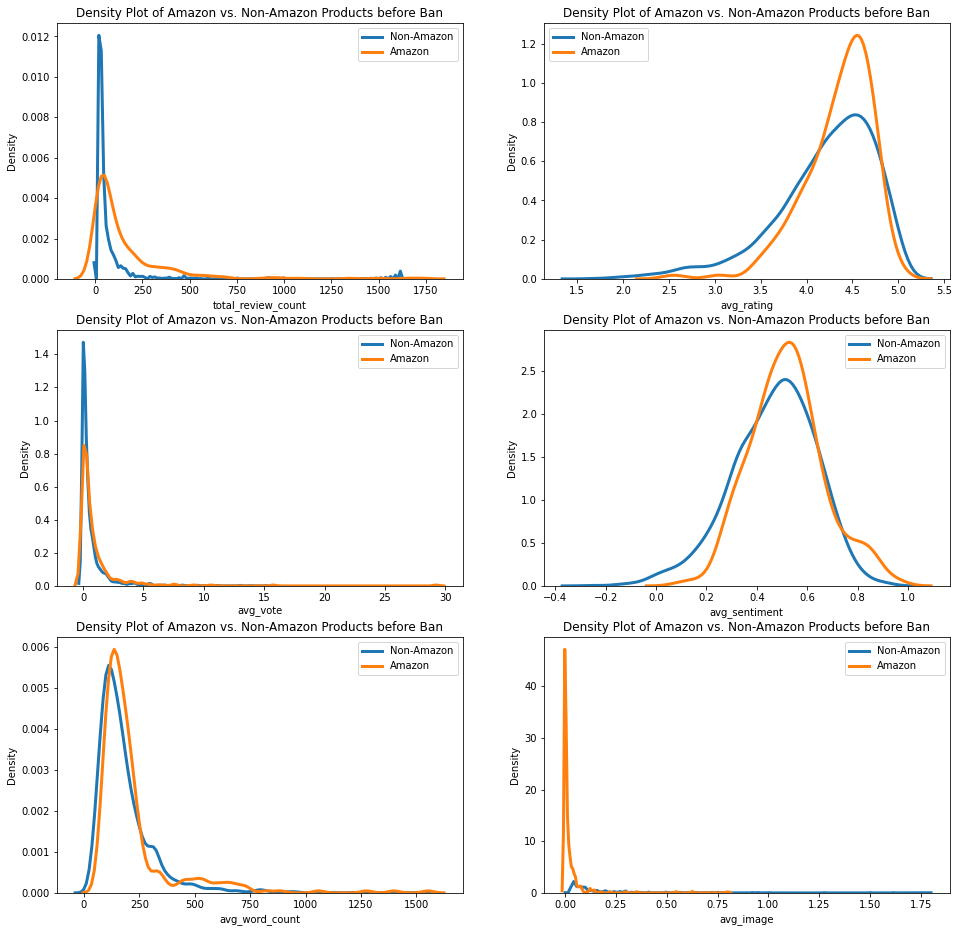

In [40]:
flags = [0,1]

plt.figure(figsize=(16,16))
for i, c in enumerate(cols):
    plt.subplot(3, 2, i+1)
    for f in flags:
        # Subset
        subset = data[data['amazon'] == f]
    
        # Draw the density plot
        sns.distplot(subset[c], hist = False, kde = True,
                     kde_kws = {'linewidth': 3},
                     label = labels[f])
    
    # Plot formatting
    plt.title('Density Plot of Amazon vs. Non-Amazon Products before Ban')
    plt.xlabel(c)
    plt.ylabel('Density')
plt.savefig('plots/pdf-amazon-vs-non-amazon-before-ban.png')
plt.show()

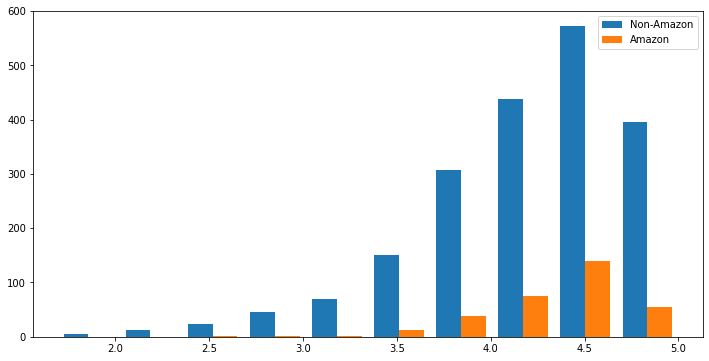

In [14]:
plt.figure(figsize=(12,6))
namazon = data[data['amazon'] == 0]['avg_rating'].to_numpy()
amazon = data[data['amazon'] == 1]['avg_rating'].to_numpy()
n, bins, patches = plt.hist([namazon, amazon], label=labels)
plt.legend(loc='upper right')
plt.show()

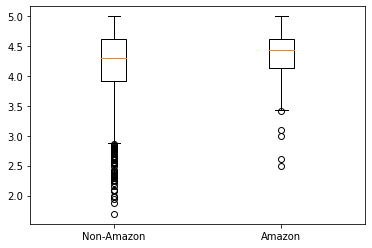

In [71]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
whiskers, caps, boxes, medians, fliers, means = plt.boxplot([namazon, amazon])
ax = plt.axes()
l = ax.set_xticklabels(labels)

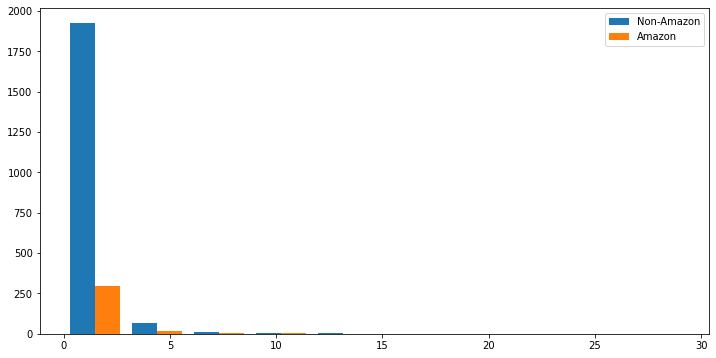

In [72]:
plt.figure(figsize=(12,6))
namazon = data[data['amazon'] == 0]['avg_vote'].to_numpy()
amazon = data[data['amazon'] == 1]['avg_vote'].to_numpy()
n, bins, patches = plt.hist([namazon, amazon], label=labels)
plt.legend(loc='upper right')
plt.show()

In [73]:
data.to_csv(file, index=None)

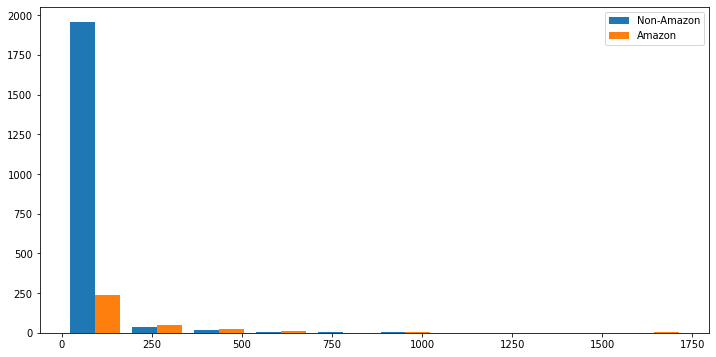

In [74]:
plt.figure(figsize=(12,6))
namazon = data[data['amazon'] == 0]['total_review_count'].to_numpy()
amazon = data[data['amazon'] == 1]['total_review_count'].to_numpy()
n, bins, patches = plt.hist([namazon, amazon], label=labels)
plt.legend(loc='upper right')
plt.show()